In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
%pip install opendatasets --quiet

Note: you may need to restart the kernel to use updated packages.


d:\nlp-btl\.venv\Scripts\python.exe: No module named pip


In [ ]:
# import opendatasets as od
# import os
# DATA_DIR = '../data/raw/iwslt15-englishvietnamese'

# if not os.path.exists(DATA_DIR):
#   os.makedirs(DATA_DIR)
#   od.download("https://www.kaggle.com/datasets/tuannguyenvananh/iwslt15-englishvietnamese", data_dir=DATA_DIR)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/tuannguyenvananh/iwslt15-englishvietnamese


100%|██████████| 10.3M/10.3M [00:03<00:00, 3.35MB/s]


In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import re
import html

In [4]:
def load_vocab(vocab_path):
  with open(vocab_path, 'r', encoding='utf-8') as f:
      tokens = {html.unescape(line.strip().lower()) for line in f if line.strip()}
  tokens.add('<pad>')
  tokens = list(tokens)
  token2id = {tok: idx for idx, tok in enumerate(tokens)}
  id2token = {idx: tok for idx, tok in enumerate(tokens)}
  return token2id, id2token

In [12]:
VOCAB_EN_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/vocab.en.txt"
VOCAB_VI_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/vocab.vi.txt"
TRAIN_EN_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/train.en.txt"
TRAIN_VI_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/train.vi.txt"
TEST_EN12_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/tst2012.en.txt"
TEST_VI12_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/tst2012.vi.txt"
TEST_EN13_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/tst2013.en.txt"
TEST_VI13_DIR = "../data/raw/iwslt15-englishvietnamese/iwslt15-englishvietnamese/IWSLT'15 en-vi/tst2013.vi.txt"

In [15]:
en_token2id, en_id2token = load_vocab(VOCAB_EN_DIR)
vi_token2id, vi_id2token = load_vocab(VOCAB_VI_DIR)
print(f'En_vocab_len: {len(en_token2id)}')
print(f'Vi_vocab_len: {len(vi_token2id)}')

En_vocab_len: 15722
Vi_vocab_len: 6469


In [16]:
vi_token2id["<pad>"]

4646

In [ ]:
import re

# tokens that contain number
for key in en_token2id:
  if bool(re.search(r"\d", key)):
    print(key)

96
3,000
50
00
650
15th
404
21st
15-year-old
98
1981
95
20th
1962
32
2100
8
150,000
1968
8,000
29th
1,200
90s
ted2011
1989
7,000
85
g8
54
20,000
16-year-old
17
3.5
1500
360
40
140
90,000
22
2.3
2012
1812
2030
1.5
83
77
6
120
48
911
.05
44
63
1850
4,500
47
700
350,000
1974
1,500
23
1.8
1800s
18th
35
45,000
100
600
86
30,000
1998
1920s
1982
30
1919
68
9,000
h1n1
1948
76
21
11,000
1930
20th-century
365
99.9
66
70-year-old
27th
1945
200,000
2d
36
300
73
4shbab
46
co2
2005
0.1
2006
18-minute
2015
51
1978
9
1000
5,000
2050
50s
32,000
1987
10th
2001
75,000
1959
13th
30th
25,000
401
4d
78
27
1928
1960
80s
1992
11th
0
5
28
1964
16
o2
10-year-old
1,100
daf-2
2011
1967
2007
11-year-old
37
15
185
600,000
19th
1956
50,000
1950
94
67
2020
130
50th
mp3
110
1800
igf-1
79
12th
1972
2013
1953
42
2008
25
1.7
17th
24-hour
10-year
56
82
16th
13.7
450
62
13,000
ted2008
750
92
52
170
1900
4th
1938
400,000
7
60s
10,000
1990s
1970
1
13-year-old
3-minute
60
1993
70,000
38
24
1954
70
1.1
35,000
1,600
top-10
1995

In [17]:
with open(TRAIN_VI_DIR, 'r', encoding='utf-8') as f:
    vi = [line.strip() for line in f]

with open(TRAIN_EN_DIR, 'r', encoding='utf-8') as f:
    en = [line.strip() for line in f]

train_df = pd.DataFrame({
    'vi': vi,
    'en': en
})

with open(TEST_VI12_DIR, 'r', encoding='utf-8') as f:
    vi = [line.strip() for line in f]

with open(TEST_EN12_DIR, 'r', encoding='utf-8') as f:
    en = [line.strip() for line in f]

test_df = pd.DataFrame({
    'vi': vi,
    'en': en
})

train_df.head()

,vi,en
0,Khoa học đằng sau một tiêu đề về khí hậu,Rachel Pike : The science behind a climate hea...
1,"Trong 4 phút , chuyên gia hoá học khí quyển Ra...","In 4 minutes , atmospheric chemist Rachel Pike..."
2,Tôi muốn cho các bạn biết về sự to lớn của nhữ...,I &apos;d like to talk to you today about the ...
3,Có những dòng trông như thế này khi bàn về biế...,Headlines that look like this when they have t...
4,Cả hai đều là một nhánh của cùng một lĩnh vực ...,They are both two branches of the same field o...


In [18]:
train_df['vi'] = train_df['vi'].apply(html.unescape)
train_df['en'] = train_df['en'].apply(html.unescape)

test_df['vi'] = test_df['vi'].apply(html.unescape)
test_df['en'] = test_df['en'].apply(html.unescape)

train_df.head()

,vi,en
0,Khoa học đằng sau một tiêu đề về khí hậu,Rachel Pike : The science behind a climate hea...
1,"Trong 4 phút , chuyên gia hoá học khí quyển Ra...","In 4 minutes , atmospheric chemist Rachel Pike..."
2,Tôi muốn cho các bạn biết về sự to lớn của nhữ...,I 'd like to talk to you today about the scale...
3,Có những dòng trông như thế này khi bàn về biế...,Headlines that look like this when they have t...
4,Cả hai đều là một nhánh của cùng một lĩnh vực ...,They are both two branches of the same field o...


In [19]:
train_df.describe()

,vi,en
count,133317,133317
unique,131881,131590
top,Xin cảm ơn .,Thank you .
freq,181,649


In [20]:
train_df[(train_df['vi'] == '') & (train_df['en'] != '')].index

Index([121148, 121635], dtype='int64')

In [21]:
train_df.loc[121148], train_df.loc[121635]

(vi     
 en    .
 Name: 121148, dtype: object,
 vi     
 en    .
 Name: 121635, dtype: object)

In [22]:
def clean_text(text):
  text = text.lower().strip()
  return text

train_df['vi'] = train_df['vi'].apply(clean_text)
train_df['en'] = train_df['en'].apply(clean_text)

train_df = train_df[train_df['vi'] != '']
train_df = train_df[train_df['en'] != '']
len(train_df)

133166

In [23]:
test_df['vi'] = test_df['vi'].apply(clean_text)

test_df['en'] = test_df['en'].apply(clean_text)
test_df

,vi,en
0,làm sao tôi có thể trình bày trong 10 phút về ...,how can i speak in 10 minutes about the bonds ...
1,câu chuyện này chưa kết thúc .,this is not a finished story .
2,nó là một trò chơi ghép hình vẫn đang được xếp .,it is a jigsaw puzzle still being put together .
3,hãy để tôi kể cho các bạn về vài mảnh ghép nhé .,let me tell you about some of the pieces .
4,hãy tưởng tượng mảnh đầu tiên : một người đàn ...,imagine the first piece : a man burning his li...
...,...,...
1548,đây không phải là vấn đề giữa quyền riêng tư v...,this is not a question between privacy against...
1549,đây là một vấn đề giữa tự do và sự kiểm soát .,it 's a question of freedom against control .
1550,và trong khi chúng ta vẫn tin tưởng vào chính ...,and while we might trust our governments right...
1551,"và liệu chúng ta có còn tin tưởng , một cách m...","and do we trust , do we blindly trust , any fu..."


In [24]:
train_df['key'] = train_df['vi'] + '_' + train_df['en']
duplicates = train_df['key'].value_counts()
duplicates = duplicates[duplicates > 1]
duplicates

key
cảm ơn ._thank you .                                              165
xin cảm ơn ._thank you .                                          156
cảm ơn các bạn ._thank you .                                       65
cám ơn ._thank you .                                               48
cảm ơn các bạn rất nhiều ._thank you very much .                   44
                                                                 ... 
dậy đi ._wake up .                                                  2
khán giả : cho tôi xem số liệu !_audience : show me the data !      2
mmmm ._mmm .                                                        2
em để chìa khoá của anh ở đâu ?_where did you leave my keys ?       2
có thể giảng dạy được phép màu ._magic can be taught .              2
Name: count, Length: 193, dtype: int64

In [25]:
train_df = train_df.drop_duplicates(subset=['key'])
len(train_df)

132146

In [26]:
vi_cnt = train_df.value_counts('vi')
vi_cnt[vi_cnt > 1]

vi
xin cảm ơn .                       10
cảm ơn các bạn rất nhiều .          9
cảm ơn .                            8
cảm ơn rất nhiều .                  8
tại sao lại như vậy ?               8
                                   ..
để tôi giải thích cho các bạn .     2
để tôi giải thích rõ hơn .          2
đừng xấu hổ .                       2
hân hạnh .                          2
ồ .                                 2
Name: count, Length: 183, dtype: int64

# Vi

In [27]:
from collections import Counter

## OOV rate

In [28]:
train_df['vi_oov_rate'] = train_df['vi'].apply(lambda x: len([token for token in x.split() if token not in vi_token2id]) / len(x.split()))
train_df['vi_oov_rate'].describe()

count    132146.000000
mean          0.008687
std           0.031582
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: vi_oov_rate, dtype: float64

In [29]:
total_oov = 0
total_tokens = 0

for sent in train_df['vi']:
    tokens = sent.split()
    total_tokens += len(tokens)
    total_oov += sum(t not in vi_token2id for t in tokens)

dataset_oov_rate = total_oov / total_tokens
dataset_oov_rate

0.007876699279856734

## Seq len

In [30]:
train_df['vi_token_cnt'] = train_df['vi'].apply(lambda x: len(x.split()))
train_df['vi_token_cnt'].describe()

count    132146.000000
mean         25.024155
std          18.770078
min           1.000000
25%          13.000000
50%          20.000000
75%          32.000000
max         850.000000
Name: vi_token_cnt, dtype: float64

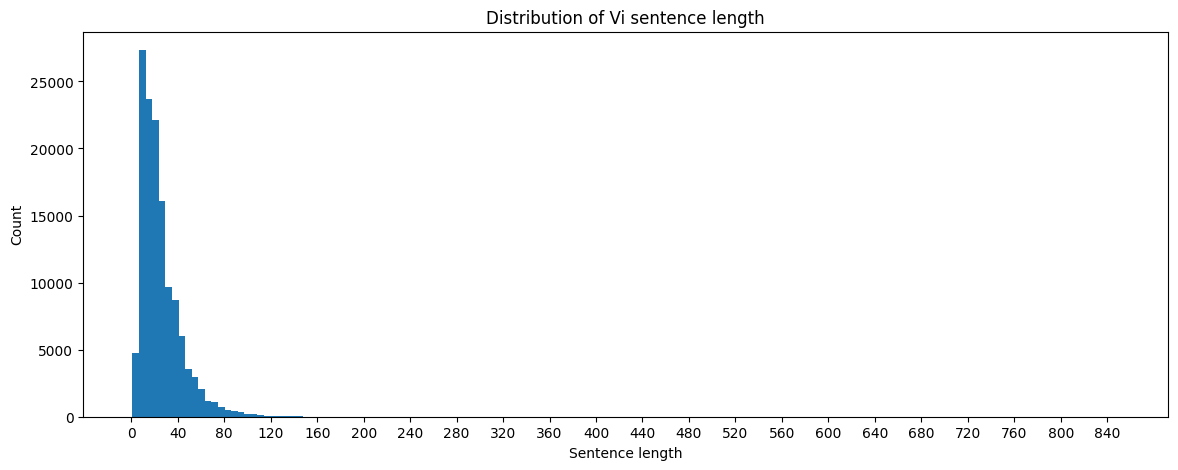

In [ ]:
plt.figure(figsize=(14, 5))
plt.hist(train_df['vi_token_cnt'], bins=150)
plt.xlabel("Sentence length")
plt.ylabel("Count")
plt.title("Distribution of Vi sentence length")

max_len = train_df['vi_token_cnt'].max()
plt.xticks(np.arange(0, max_len + 1, 40))
plt.show()

## Common words

In [31]:
all_vi_word = []

for vi in train_df['vi']:
  all_vi_word.extend(vi.split())

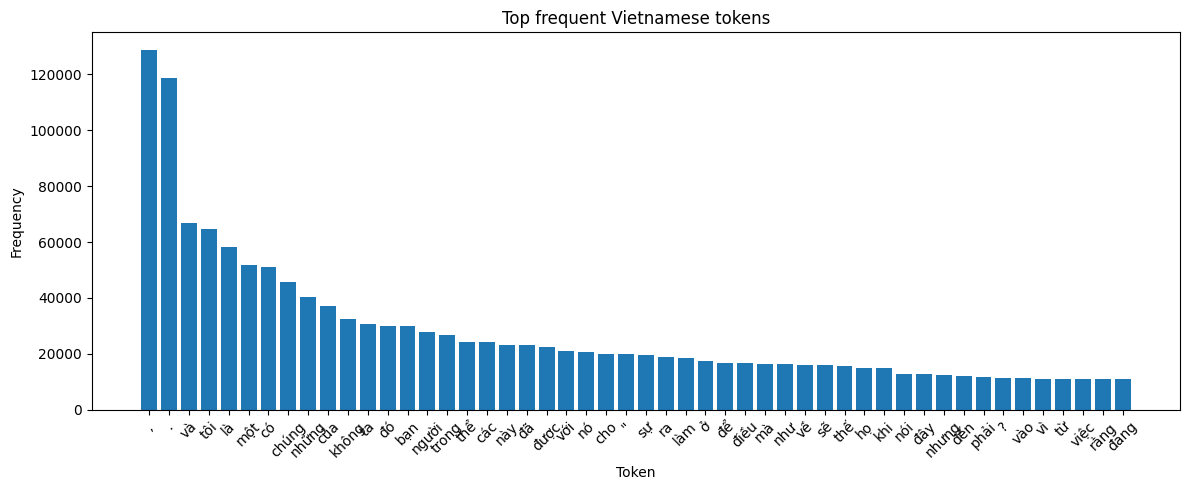

In [ ]:
vi_counter = Counter(all_vi_word)
top_tokens = vi_counter.most_common(50)
tokens = [x[0] for x in top_tokens]
freqs  = [x[1] for x in top_tokens]

plt.figure(figsize=(12, 5))
plt.bar(tokens, freqs)
plt.xticks(rotation=45)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Top frequent Vietnamese tokens")
plt.tight_layout()
plt.show()

# En

## OOV rate

In [33]:
train_df['en_oov_rate'] = train_df['en'].apply(lambda x: len([token for token in x.split() if token not in en_token2id]) / len(x.split()))
train_df['en_oov_rate'].describe()

count    132146.000000
mean          0.021101
std           0.045500
min           0.000000
25%           0.000000
50%           0.000000
75%           0.027027
max           1.000000
Name: en_oov_rate, dtype: float64

In [34]:
total_oov = 0
total_tokens = 0

for sent in train_df['en']:
    tokens = sent.split()
    total_tokens += len(tokens)
    total_oov += sum(t not in en_token2id for t in tokens)

dataset_oov_rate = total_oov / total_tokens
dataset_oov_rate

0.02061993766357945

# Seq len

In [35]:
train_df['en_token_cnt'] = train_df['en'].apply(lambda x: len(x.split()))
train_df['en_token_cnt'].describe()

count    132146.000000
mean         20.450358
std          15.014523
min           1.000000
25%          11.000000
50%          17.000000
75%          26.000000
max         628.000000
Name: en_token_cnt, dtype: float64

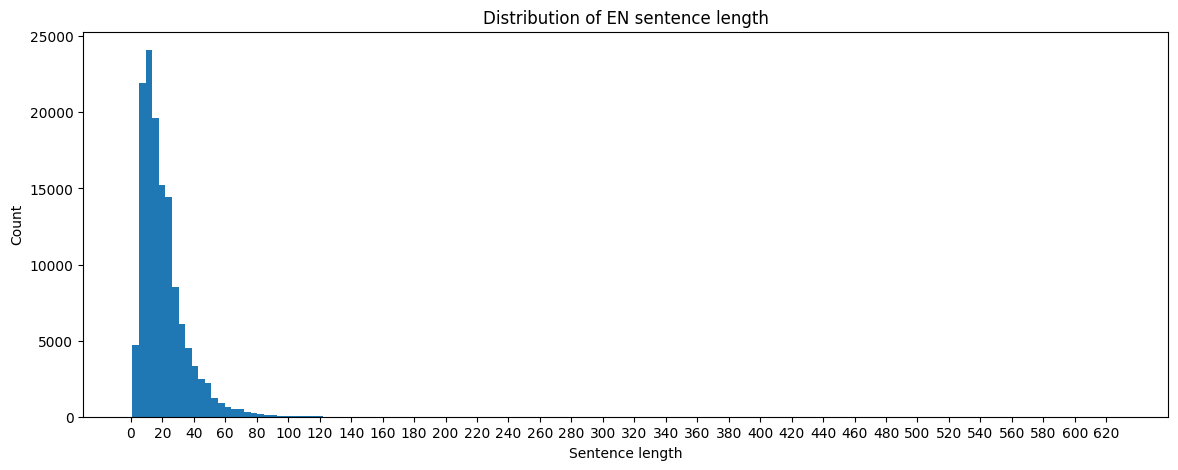

In [36]:
plt.figure(figsize=(14, 5))
plt.hist(train_df['en_token_cnt'], bins=150)
plt.xlabel("Sentence length")
plt.ylabel("Count")
plt.title("Distribution of EN sentence length")
max_len = train_df['en_token_cnt'].max()

plt.xticks(np.arange(0, max_len + 1, 20))
plt.show()

## Word count

In [37]:
all_en_word = []

for en in train_df['en']:
  all_en_word.extend(en.split())

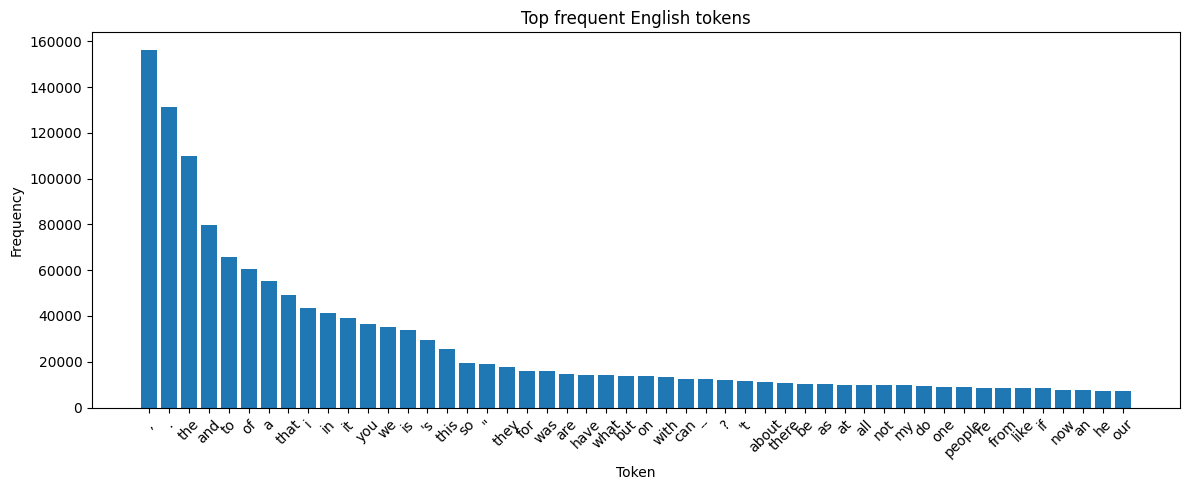

In [38]:
en_counter = Counter(all_en_word)
top_tokens = en_counter.most_common(50)

tokens = [x[0] for x in top_tokens]
freqs  = [x[1] for x in top_tokens]

plt.figure(figsize=(12, 5))
plt.bar(tokens, freqs)
plt.xticks(rotation=45)
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.title("Top frequent English tokens")
plt.tight_layout()
plt.show()

In [39]:
test_df.head()

,vi,en
0,làm sao tôi có thể trình bày trong 10 phút về ...,how can i speak in 10 minutes about the bonds ...
1,câu chuyện này chưa kết thúc .,this is not a finished story .
2,nó là một trò chơi ghép hình vẫn đang được xếp .,it is a jigsaw puzzle still being put together .
3,hãy để tôi kể cho các bạn về vài mảnh ghép nhé .,let me tell you about some of the pieces .
4,hãy tưởng tượng mảnh đầu tiên : một người đàn ...,imagine the first piece : a man burning his li...


# VI - EN

In [40]:
train_df['seq_len_ratio'] = train_df['vi_token_cnt'] / train_df['en_token_cnt']
train_df['seq_len_ratio'].describe()

count    132146.000000
mean          1.240206
std           0.263370
min           0.214286
25%           1.071429
50%           1.222222
75%           1.384615
max           6.000000
Name: seq_len_ratio, dtype: float64

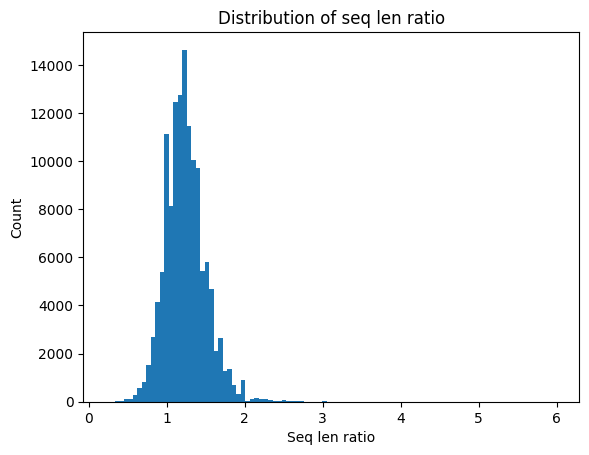

In [41]:
plt.figure()
plt.hist(train_df['seq_len_ratio'], bins=100)
plt.xlabel("Seq len ratio")
plt.ylabel("Count")
plt.title("Distribution of seq len ratio")
plt.show()

# Export cleaned df to csv

In [43]:
train_df = train_df[['vi', 'en']]
test_df = test_df[['vi', 'en']]

In [ ]:
import os

# CLEAN_PATH = '../data/cleaned'
CLEAN_PATH = '../data/archive'
if not os.path.exists(CLEAN_PATH):
  os.makedirs(CLEAN_PATH)

In [48]:
train_df.to_csv(CLEAN_PATH + '/train.csv', index=False)
test_df.to_csv(CLEAN_PATH + '/test.csv', index=False)

In [49]:
import json

def export_vocab(path, vocab):
  with open(path, 'w') as f:
    json.dump(vocab, f)

export_vocab(CLEAN_PATH + '/en_token2id.json', en_token2id)
export_vocab(CLEAN_PATH + '/en_id2token.json', en_id2token)
export_vocab(CLEAN_PATH + '/vi_token2id.json', vi_token2id)
export_vocab(CLEAN_PATH + '/vi_id2token.json', vi_id2token)

# BPE

In [ ]:
# import sentencepiece as spm

In [ ]:
# vi_all = pd.concat([train_df['vi'], test_df['vi']])
# en_all = pd.concat([train_df['en'], test_df['en']])

# with open("/content/drive/MyDrive/NLP/data/cleaned/all_vi.txt", "w", encoding="utf-8") as f:
#   for s in vi_all:
#     f.write(s.strip() + "\n")

# with open("/content/drive/MyDrive/NLP/data/cleaned/all_en.txt", "w", encoding="utf-8") as f:
#   for s in en_all:
#     f.write(s.strip() + "\n")

In [ ]:
# # Vietnamese
# spm.SentencePieceTrainer.train(
#     input='/content/drive/MyDrive/NLP/data/cleaned/all_vi.txt',
#     model_prefix='/content/drive/MyDrive/NLP/data/cleaned/spm_vi',
#     vocab_size=5000,
#     model_type='bpe',
#     character_coverage=0.9995,
#     pad_id=4999
# )

# # English
# spm.SentencePieceTrainer.train(
#     input='/content/drive/MyDrive/NLP/data/cleaned/all_en.txt',
#     model_prefix='/content/drive/MyDrive/NLP/data/cleaned/spm_en',
#     vocab_size=10000,
#     model_type='bpe',
#     pad_id=9999
# )


In [ ]:
# # check

# sp_vi = spm.SentencePieceProcessor()
# sp_vi.load("/content/drive/MyDrive/NLP/data/cleaned/spm_vi.model")

# sp_en = spm.SentencePieceProcessor()
# sp_en.load("/content/drive/MyDrive/NLP/data/cleaned/spm_en.model")

# EN_PAD_ID = sp_en.pad_id()
# EN_BOS_ID = sp_en.bos_id()
# EN_EOS_ID = sp_en.eos_id()
# EN_UNK_ID = sp_en.unk_id()

# VI_PAD_ID = sp_vi.pad_id()
# VI_BOS_ID = sp_vi.bos_id()
# VI_EOS_ID = sp_vi.eos_id()
# VI_UNK_ID = sp_vi.unk_id()

# EN_PAD_ID, EN_BOS_ID, EN_EOS_ID, EN_UNK_ID, VI_PAD_ID, VI_BOS_ID, VI_EOS_ID, VI_UNK_ID

(9999, 1, 2, 0, 4999, 1, 2, 0)

In [ ]:
# encoded_ids = sp_en.encode('hello world', out_type=int)
# encoded_ids

[6171, 266]

In [ ]:
# decoded_text = sp_en.decode(encoded_ids)
# decoded_text

'hello world'